In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [21]:
winequality ='winequality.csv'
df = pd.read_csv(winequality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
#separate into red and white
reds = df[df['type'] == 'red']
whites = df[df['type'] == 'white']

In [23]:
#drop type
reds = reds.drop(reds[['type']], axis=1)
whites = whites.drop(whites[['type']], axis=1)

In [30]:
reds.sort_values(by='quality', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [29]:
scaler = preprocessing.StandardScaler()
scaled_reds = scaler.fit_transform(reds)
scaled_reds = pd.DataFrame(scaled_reds, columns=list(reds.columns))
scaled_reds.sort_values(by='quality', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,1.367591,-0.993390,1.330102,0.043416,-0.371229,-1.039977,-0.926494,0.240266,-1.043897,-0.048089,0.541630,2.92819
1403,-0.643266,-1.105120,0.303093,-0.595114,-0.562513,-1.231239,-1.017721,-0.395750,-0.525555,2.607500,-0.397043,2.92819
390,-1.562514,1.799848,-1.134720,-0.807957,-0.902572,-0.370562,1.262952,-2.303799,1.612607,0.955133,2.325108,2.92819
1061,0.448342,-0.714066,1.176051,-0.524166,-0.349975,-0.848716,-0.926494,-1.127169,-0.655141,0.187963,1.949639,2.92819
1202,0.161077,-0.602337,0.611196,-0.524166,-0.413736,-0.944346,-1.048130,-0.840962,0.251958,0.187963,1.198701,2.92819


In [31]:
scaler = preprocessing.StandardScaler()
scaled_whites = scaler.fit_transform(whites)
scaled_whites = pd.DataFrame(scaled_whites, columns=list(whites.columns))
scaled_whites.sort_values(by='quality', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
827,0.646153,-0.379435,0.213280,-0.865894,-0.676212,-0.488556,0.015046,-1.162768,0.607565,-0.086290,1.613768,3.525602
1605,0.290611,-0.180992,1.287594,-0.826458,-0.630437,-0.253336,-0.596809,-1.246363,1.203650,-0.612079,1.938840,3.525602
876,0.053583,0.811227,0.048001,-0.432100,-1.271294,1.275590,-0.455612,-1.413554,0.607565,-1.137868,1.776304,3.525602
774,2.660891,-0.081770,0.957036,0.829844,-0.493110,-0.429751,-0.337948,0.993988,0.077712,-0.261553,-0.092863,3.525602
820,-0.301959,0.811227,-0.365197,-0.944765,-1.133967,-0.664970,-1.255730,-1.463711,1.468577,1.052920,1.532500,3.525602


In [32]:
scaled_whites.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


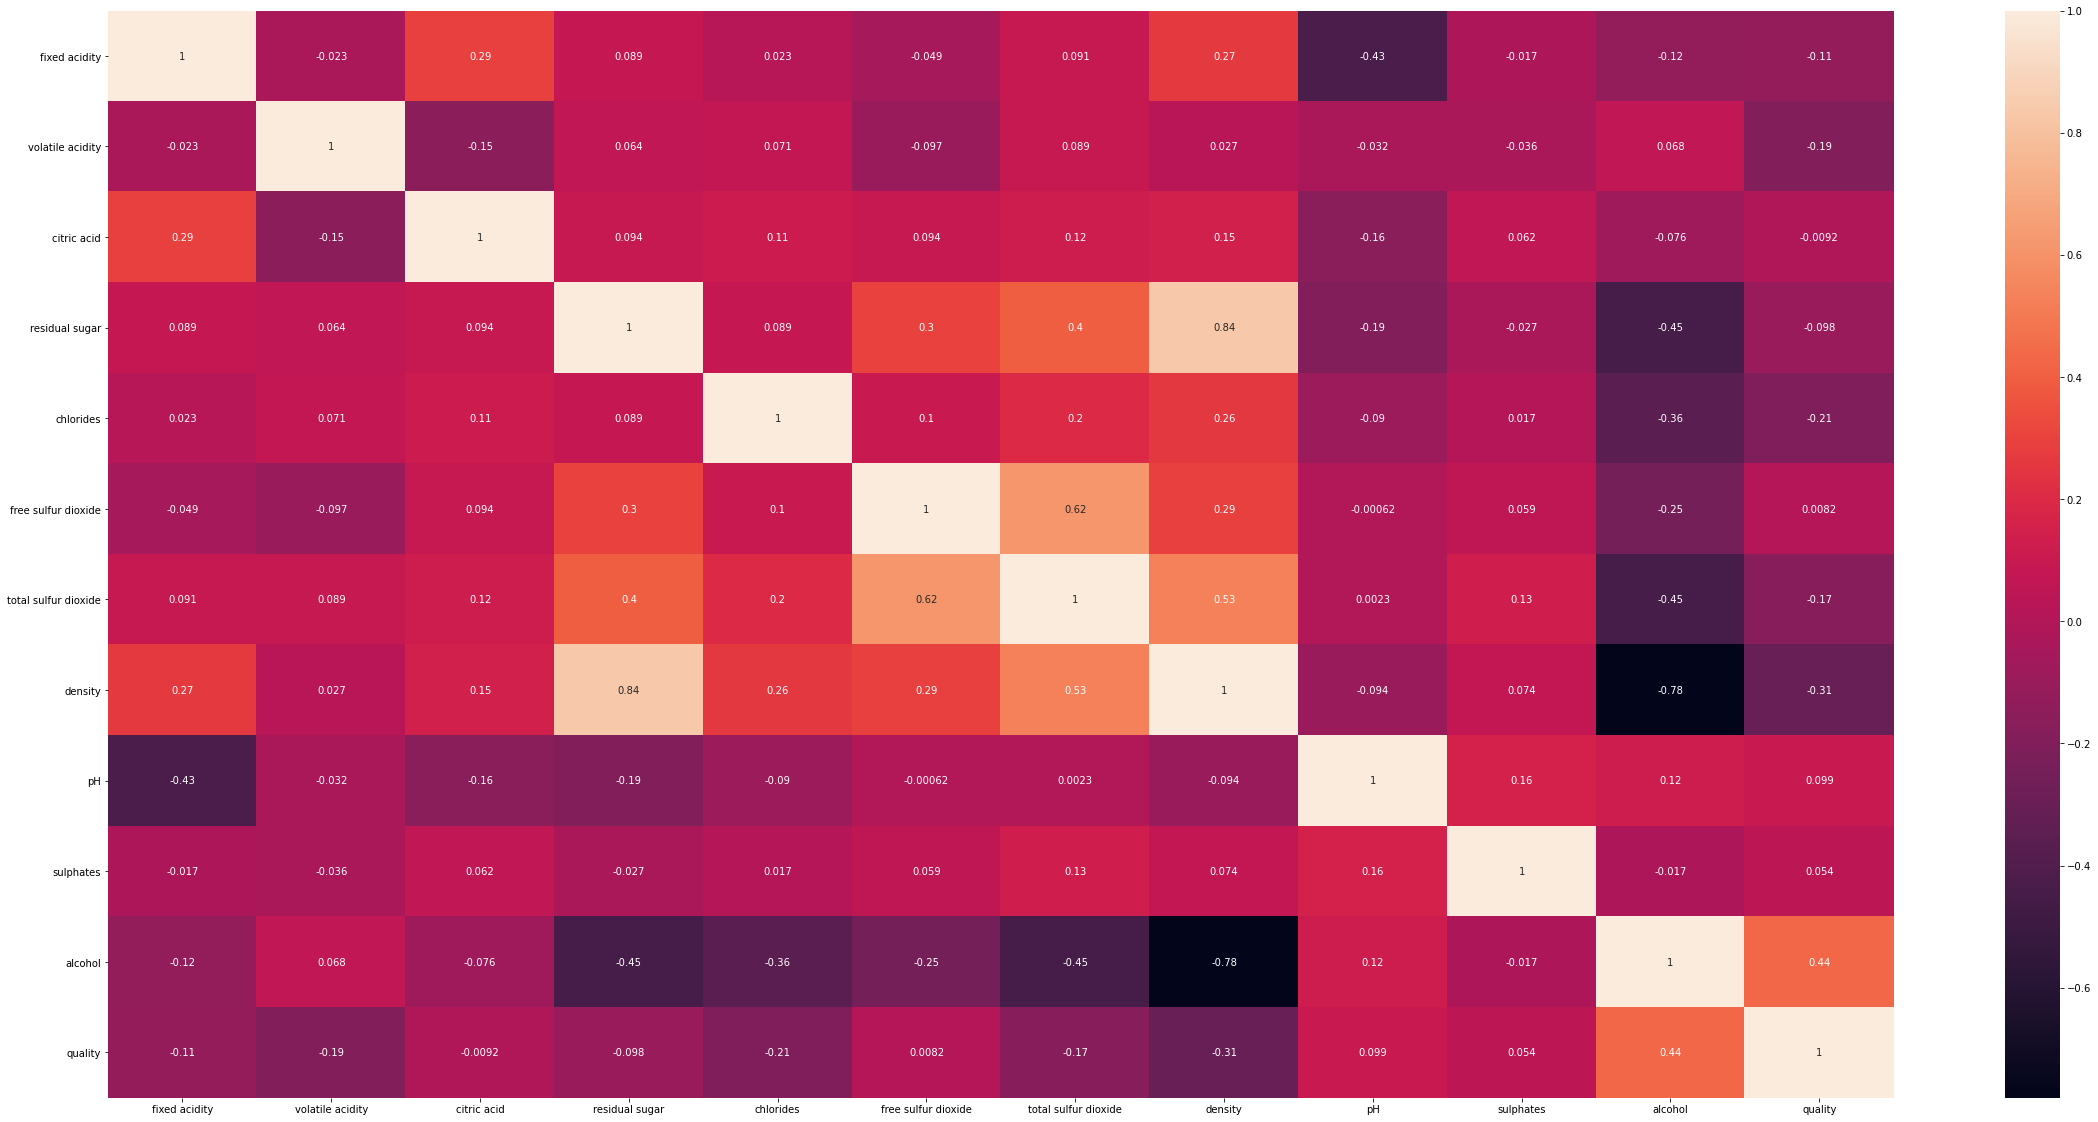

In [33]:
plt.figure(figsize=(40,20))
sns.heatmap(scaled_whites.corr(), annot=True)

In [17]:
#separate into high quality and low
reds_low = reds[reds['quality'] <= 5 ]
reds_high = reds[reds['quality'] > 5 ]
whites_low = whites[whites['quality'] <= 5 ]
whites_high = whites[whites['quality'] > 5 ]

In [39]:
# Fit, transform and train
X = prescaled_df[["density"]]
y = prescaled_df[["alcohol"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)
print(rModel.score(X_train, y_train))

0.46089492643867636


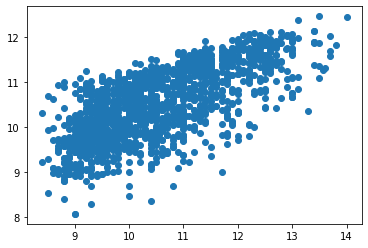

In [40]:
y_pred = rModel.predict(X_test)
plt.scatter(y_test,y_pred)

In [41]:
X = df[["density"]] 
X = sm.add_constant(X)
y = df[["alcohol"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
Model = sm.OLS(y_train, X_train)
Model_results = Model.fit()
Model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     4163.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:47:59   Log-Likelihood:                -6296.3
No. Observations:                4872   AIC:                         1.260e+04
Df Residuals:                    4870   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.4393      4.153     67.053      0.000     270.299     286.580
density     -269.3728      4.175    -64.525      0.000    -277.557    -261.189
==============================================================================
Omnibus:                     1753.178   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25288.770
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                      13.847   Cond. No.                         658.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""